### Exampole to use ASQESpectrometer class to take a spctrum data

In [1]:
from libspec import ASQESpectrometer

spec = ASQESpectrometer()
data = spec.read_calibration_file()

In [2]:
data

bytearray(b'LR2B4.0 c.Y 3209\r\n3.570000e-001\t\r\n532.100000\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n978.383\t\r\n978.171\t\r\n977.960\t\r\n977.748\t\r\n977.536\t\r\n977.324\t\r\n977.112\t\r\n976.901\t\r\n976.689\t\r\n976.477\t\r\n976.265\t\r\n976.053\t\r\n975.842\t\r\n975.630\t\r\n975.418\t\r\n975.206\t\r\n974.994\t\r\n974.782\t\r\n974.571\t\r\n974.359\t\r\n974.147\t\r\n973.935\t\r\n973.723\t\r\n973.512\t\r\n973.300\t\r\n973.088\t\r\n972.876\t\r\n972.664\t\r\n972.453\t\r\n972.241\t\r\n972.029\t\r\n971.817\t\r\n971.605\t\r\n971.394\t\r\n971.182\t\r\n970.970\t\r\n970.758\t\r\n970.546\t\r\n970.335\t\r\n970.123\t\r\n969.911\t\r\n969.699\t\r\n969.487\t\r\n969.276\t\r\n969.064\t\r\n968.852\t\r\n968.640\t\r\n968.428\t\r\n968.217\t\r\n968.005\t\r\n967.793\t\r\n967.581\t\r\n967.369\t\r\n967.157\t\r\n966.946\t\r\n966.734\t\r\n966.522\t\r\n966.310\t\r\n966.098\t\r\n965.887\t\r\n965.675\t\r\n965.463\t\r\n965.251\t\r\n965.039\t\r\n964.828\t\r\n964.616\t\r\n964.404\t\r\n964.192\t\r\n963.980\t\r\n

In [3]:
decode_data = data.decode("utf-8")

In [4]:
decode_data

'LR2B4.0 c.Y 3209\r\n3.570000e-001\t\r\n532.100000\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n978.383\t\r\n978.171\t\r\n977.960\t\r\n977.748\t\r\n977.536\t\r\n977.324\t\r\n977.112\t\r\n976.901\t\r\n976.689\t\r\n976.477\t\r\n976.265\t\r\n976.053\t\r\n975.842\t\r\n975.630\t\r\n975.418\t\r\n975.206\t\r\n974.994\t\r\n974.782\t\r\n974.571\t\r\n974.359\t\r\n974.147\t\r\n973.935\t\r\n973.723\t\r\n973.512\t\r\n973.300\t\r\n973.088\t\r\n972.876\t\r\n972.664\t\r\n972.453\t\r\n972.241\t\r\n972.029\t\r\n971.817\t\r\n971.605\t\r\n971.394\t\r\n971.182\t\r\n970.970\t\r\n970.758\t\r\n970.546\t\r\n970.335\t\r\n970.123\t\r\n969.911\t\r\n969.699\t\r\n969.487\t\r\n969.276\t\r\n969.064\t\r\n968.852\t\r\n968.640\t\r\n968.428\t\r\n968.217\t\r\n968.005\t\r\n967.793\t\r\n967.581\t\r\n967.369\t\r\n967.157\t\r\n966.946\t\r\n966.734\t\r\n966.522\t\r\n966.310\t\r\n966.098\t\r\n965.887\t\r\n965.675\t\r\n965.463\t\r\n965.251\t\r\n965.039\t\r\n964.828\t\r\n964.616\t\r\n964.404\t\r\n964.192\t\r\n963.980\t\r\n963.769\t\r

In [5]:
# Skip the first 3 lines
type(decode_data)

str

In [6]:
lines = decode_data.splitlines()
data_1 = lines[12:3665]    
data_2 = lines[3666:7319]
data_3 = lines[7320:10973]


In [30]:
import pandas as pd

def convert_three_lists_to_df(decode_data):
    lines = decode_data.splitlines()

    # Extract each data block
    data_1 = lines[13:3665]
    data_2 = lines[3667:7319]
    data_3 = lines[7321:10973]

    # Convert each line to float, skipping invalid entries
    def to_float_list(data_lines):
        return [float(line.strip()) for line in data_lines if line.strip()]

    col1 = to_float_list(data_1)
    col2 = to_float_list(data_2)
    col3 = to_float_list(data_3)

    # Find minimum length to align columns
    min_len = min(len(col1), len(col2), len(col3))

    # Trim all to the same length
    df = pd.DataFrame({
        "Col1": col1[:min_len],
        "Col2": col2[:min_len],
        "Col3": col3[:min_len]
    })

    return df


In [31]:
print(convert_three_lists_to_df(decode_data))

         Col1  Col2    Col3
0     978.171   1.0  88.711
1     977.960   1.0  88.441
2     977.748   1.0  88.162
3     977.536   1.0  87.905
4     977.324   1.0  87.664
...       ...   ...     ...
3647  276.045   1.0  23.789
3648  275.867   1.0  22.737
3649  275.688   1.0  41.486
3650  275.510   1.0  44.656
3651  275.331   1.0   0.000

[3652 rows x 3 columns]


In [19]:
import pandas as pd

def read_custom_text_data(text_data):
    lines = text_data.splitlines()

    # Skip the first 3 lines
    lines = lines[3:]

    data = []  # List to hold extracted data columns
    column_data = []  # Temporary storage for one segment

    for line in lines:
        line = line.strip()

        # If line is empty and we have collected data, store it in 'data' list
        if line == "" and column_data:
            data.append(column_data)
            column_data = []
            continue

        # Try to parse the line as a number
        try:
            number = float(line)
            column_data.append(number)
        except ValueError:
            continue  # Ignore non-numeric lines (if any)

    # Append last set of collected data (if any)
    if column_data:
        data.append(column_data)

    # Convert to DataFrame
    df = pd.DataFrame(data).T  # Transpose so each segment becomes a column
    return df


In [20]:
df = read_custom_text_data(decode_data)
print(df)

            0       1
0     978.383   1.000
1     978.171   1.000
2     977.960   1.000
3     977.748   1.000
4     977.536   1.000
...       ...     ...
7303      NaN  22.737
7304      NaN  41.486
7305      NaN  44.656
7306      NaN   0.000
7307      NaN   0.000

[7308 rows x 2 columns]


In [22]:
import pandas as pd

def read_three_column_data(text_data, max_rows=3654):
    lines = text_data.splitlines()
    lines = lines[3:]  # Skip the first 3 lines

    values = []

    for line in lines:
        line = line.strip()
        if not line:
            continue

        try:
            number = float(line)
            values.append(number)
        except ValueError:
            continue

        # Stop if we have enough values for max_rows × 3 columns
        if len(values) >= max_rows * 3:
            break

    # Group values into rows of 3
    grouped_data = [values[i:i+3] for i in range(0, len(values), 3)]

    # Truncate to exactly max_rows (in case last row is incomplete)
    grouped_data = grouped_data[:max_rows]

    # Create DataFrame
    df = pd.DataFrame(grouped_data, columns=["Col1", "Col2", "Col3"])
    return df


In [24]:
df = read_three_column_data(decode_data)
print(df)

         Col1     Col2     Col3
0     978.383  978.171  977.960
1     977.748  977.536  977.324
2     977.112  976.901  976.689
3     976.477  976.265  976.053
4     975.842  975.630  975.418
...       ...      ...      ...
3649    7.368    7.601    7.746
3650    7.422    7.309    7.877
3651   17.111   20.198   23.789
3652   22.737   41.486   44.656
3653    0.000    0.000      NaN

[3654 rows x 3 columns]


In [21]:
with open("output.txt", "w", encoding="utf-8") as f:
    f.write(data.decode("utf-8"))

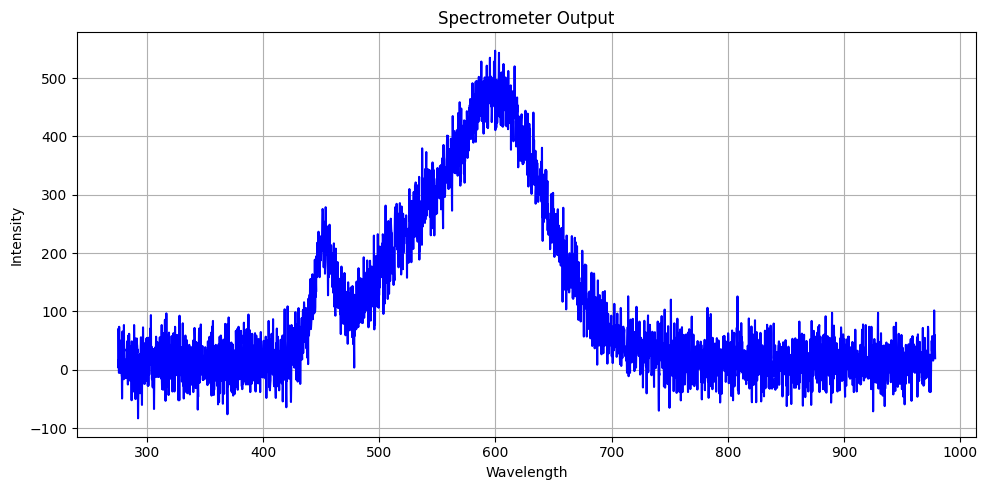

In [2]:
from libspec import ASQESpectrometer
import matplotlib.pyplot as plt
import numpy as np


spectrometer = ASQESpectrometer()                    # Class Initialization
spectrometer.configure_acquisition()                 # Use standart configuration to take a sceprum data
#spectrum = spectrometer.get_spectrum()               # Get the spectrum data from spectrometr 
#spectrum = spectrometer.subtract_background(spectrum)
#spectrum = spectrometer.normalize_spectrum(spectrum)

wavelength, intensity = spectrometer.normalize_spectrum()


# Convert ctypes array to numpy array
#intensity = np.ctypeslib.as_array(spectrum)
# Generate pixel indices (or wavelengths if you have calibration)
#pixels = np.arange(len(intensity))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(wavelength, intensity, color='blue')
plt.title('Spectrometer Output')
plt.xlabel('Wavelength')
plt.ylabel('Intensity') #(uW/cm^2/nm)
plt.grid(True)
plt.tight_layout()
plt.show()